# Business Case: Aerofit - Descriptive Statistics & Probability

## Instruction and Raw Problem

## Mindset:

- Evaluation will be kept lenient, so make sure you attempt this case study.
- Read the question carefully and try to understand what exactly is being asked.
- Brainstorm a little. If you’re getting an error, remember that Google is your best friend.
- You can watch the lecture recordings or go through your lecture notes once again if you feel like you’re getting confused over some specific topics.
- Discuss your problems with your peers. Make use of the Slack channel and WhatsApp group.
- Only if you think that there’s a major issue, you can reach out to your Instructor via Slack or Email.
- There is no right or wrong answer. We have to get used to dealing with uncertainty in business. This is exactly the skill we want to develop.

## About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: Aerofit_treadmill.csv

- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the - treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles:	The average number of miles the customer expects to walk/run each week

### Product Portfolio

- The KP281 is an entry-level treadmill that sells for USD 1,500
- The KP481 is for mid-level runners that sell for USD 1750
- The KP781 treadmill is having advanced features that sell for USD 2500

### What good looks like?

- Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
- Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
- Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
- Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
- Check correlation among different factors using heat maps or pair plots.
- With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
- Customer Profiling - Categorization of users.
- Probability- marginal, conditional probability.
- Some recommendations and actionable insights, based on the inferences.
- Later on, we will see more ways to do “customer segmentation”, but this case study in itself is relevant in some real-world scenarios.

### Submission Process

Type your insights and recommendations in the text editor.
Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it in your Google Drive (set the permission to allow public access), and paste that link in the text editor.
Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
After submitting, you will not be allowed to edit your submission.

## Basic Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install gdown
!gdown 1eylGX3HjZtcwmfZYRP1BAqzom6rKNLZy

Downloading...
From: https://drive.google.com/uc?id=1eylGX3HjZtcwmfZYRP1BAqzom6rKNLZy
To: /content/d5_aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 23.1MB/s]


In [ ]:
df = pd.read_csv('d5_aerofit_treadmill.csv')
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
69,KP281,38,Female,14,Partnered,2,3,54576,56
29,KP281,25,Female,14,Partnered,2,2,53439,47
12,KP281,22,Female,16,Single,4,3,36384,75
3,KP281,19,Male,12,Single,3,3,32973,85
164,KP781,28,Male,18,Single,6,5,88396,150
40,KP281,26,Male,16,Single,3,3,50028,85
171,KP781,33,Female,18,Partnered,4,5,95866,200
21,KP281,23,Male,16,Single,4,3,40932,94
82,KP481,20,Female,14,Partnered,3,3,34110,106
111,KP481,27,Male,14,Single,4,2,45480,53


- Data Types of different columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


As given in busines problem - the details about the data in the columns, checking on the data above we don't need to change any data type as of now.

- Product Purchased: KP281, KP481, or KP781
- Age: In years
- Gender: Male/Female
- Education: In years
- MaritalStatus: Single or partnered
- Usage: The average number of times the customer plans to use the - treadmill each week.
- Income: Annual income (in $)
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles: The average number of miles the customer expects to walk/run each week





### Checking on Null values

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

- Good News - we don't have any Null values in the data

- Let's check the type of products

In [ ]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

### Duplicate Detection

In [ ]:
df.duplicated().value_counts()

False    180
Name: count, dtype: int64

- There are no duplicates in the data

### Check unique values in columns

In [ ]:
# looping through each column in the
#sorting the values in each column
for i in df.columns:
  print('Unique Values in',i,'column are :-')
  print(sorted(df[i].unique()))
  print(80*'-')


Unique Values in Product column are :-
['KP281', 'KP481', 'KP781']
--------------------------------------------------------------------------------
Unique Values in Age column are :-
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50]
--------------------------------------------------------------------------------
Unique Values in Gender column are :-
['Female', 'Male']
--------------------------------------------------------------------------------
Unique Values in Education column are :-
[12, 13, 14, 15, 16, 18, 20, 21]
--------------------------------------------------------------------------------
Unique Values in MaritalStatus column are :-
['Partnered', 'Single']
--------------------------------------------------------------------------------
Unique Values in Usage column are :-
[2, 3, 4, 5, 6, 7]
--------------------------------------------------------------------------------
Unique Values in Fitness co

- As this dataset have only 180 line items , so above can be useful to check the unique value present in the columns.

## Adding Categorical columns

#### Age category

 We have buyers from min 18 to max 50 years of age.

In [ ]:
#bins for the age colum
bins1 = [17, 25, 35, 45, 50]
#labels would be 1 less than bins
labels1 = ['Youth', 'Adult', 'Middle Aged', 'Senior']

#creating a new column for the age cat
df['age_group'] = pd.cut( df['Age'], bins = bins1, labels = labels1)
df['age_group'].value_counts()

age_group
Youth          79
Adult          73
Middle Aged    22
Senior          6
Name: count, dtype: int64

#### Education category

Education have values from 12 to 21

In [ ]:
bins2 = [0, 12, 15, 21]
labels2 = ['Primary', 'Secondary', 'Higher']

#creating a new column for the age cat
df['edu_group'] = pd.cut( df['Education'], bins = bins2, labels = labels2)
df['edu_group'].value_counts()

edu_group
Higher       112
Secondary     65
Primary        3
Name: count, dtype: int64

#### Miles category

Unique values in miles are from 21 to 360

In [ ]:
bins3 = [0, 50, 100, 200, 400]
labels3 = ['Beginner', 'Moderate', 'Active', 'Enthusiast']

#creating a new column for the age cat
df['miles_group'] = pd.cut( df['Miles'], bins = bins3, labels = labels3)
df['miles_group'].value_counts()

miles_group
Moderate      97
Active        60
Beginner      17
Enthusiast     6
Name: count, dtype: int64

#### Income category

Incomes ranges from 29-105K

In [ ]:
bins4 = [0, 40000, 60000, 80000, 120000]
labels4 = ['Low income', 'Moderate income', 'High income', 'Very High income']

#creating a new column for the age cat
df['income_group'] = pd.cut( df['Income'], bins = bins4, labels = labels4)
df['income_group'].value_counts()

income_group
Moderate income     106
Low income           32
High income          23
Very High income     19
Name: count, dtype: int64

- This looks healthy distribution of income groups, near to what we see in real life, similar to other categories we created.

Let's check the df with new column for categories of age, income, education and fitness.

In [ ]:
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,miles_group,income_group
2,KP281,19,Female,14,Partnered,4,3,30699,66,Youth,Secondary,Moderate,Low income
82,KP481,20,Female,14,Partnered,3,3,34110,106,Youth,Secondary,Active,Low income
100,KP481,25,Female,14,Partnered,5,3,47754,106,Youth,Secondary,Active,Moderate income
88,KP481,23,Male,14,Partnered,3,3,38658,85,Youth,Secondary,Moderate,Low income
102,KP481,25,Female,14,Single,2,3,43206,64,Youth,Secondary,Moderate,Moderate income
139,KP481,48,Male,16,Partnered,2,3,57987,64,Senior,Higher,Moderate,Moderate income
72,KP281,39,Male,16,Partnered,4,4,59124,132,Middle Aged,Higher,Active,Moderate income
133,KP481,38,Female,16,Partnered,4,3,62535,85,Middle Aged,Higher,Moderate,High income
116,KP481,31,Female,16,Partnered,2,3,51165,64,Adult,Higher,Moderate,Moderate income
93,KP481,23,Male,16,Partnered,3,3,45480,64,Youth,Higher,Moderate,Moderate income


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    object  
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    object  
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   age_group      180 non-null    category
 10  edu_group      180 non-null    category
 11  miles_group    180 non-null    category
 12  income_group   180 non-null    category
dtypes: category(4), int64(6), object(3)
memory usage: 14.2+ KB


Now we can 4 other columns are added with 'category' datatype

## Customer Profiling

### On whole Aerofit data

- let's check the variety of the data for the whole dataframe for a summary of descriptive statistics for a DataFrame's numeric and non-numeric columns.

- Non-numeric columns

In [ ]:
df.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


- There are total 180 line items in the aerofit data
- Product : There are three kind of produts available, out of which KP281 is top selling trademill which is sold almost 80 times out of 180
- Gender : Most of the males are purchasing the trademill. 104 out of 180 times purchased by male customers.
- MaritalStatus : 107 out 180 times purchased by the Partnerd i.e. married people.
- further trademill type wise insight we will create while doing further analysis.

- Numeric columns

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- Age : Most of the people who purchase the trademill are within the range of 18 to 50 years old with median and mean age being 26 and 29 years respectively. IQR ranges between 24 to 33 years.
- Education : Median years of education is 16 years which very near to mean eductaion because of low std deviation of 1.61 years.
- Usage : median usages is 3 times per week. with min of 2 times and 7 times max.
- Fitess : median fitness is 3 on scale, which most of the users is somewhere in the middle of the fitness range. IQR is 3 to 4.
- Income : median income is around 50K with avg if 53K and IQR is somewhere between 44K to 58K.
- Miles : median value of avg no of miles the customer expects to walk/run each week is 94 miles each week, with IQR ranging between 66 to 114 miles/week.

### On KP281 - Entry level T1

In [ ]:
df_T1 = df[df['Product'] == 'KP281']
df_T1.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,miles_group,income_group
65,KP281,35,Female,18,Single,3,3,67083,85,Adult,Higher,Moderate,High income
66,KP281,36,Male,12,Single,4,3,44343,94,Middle Aged,Primary,Moderate,Moderate income
42,KP281,27,Male,16,Single,4,3,54576,85,Adult,Higher,Moderate,Moderate income
51,KP281,29,Female,14,Partnered,2,2,46617,38,Adult,Secondary,Beginner,Moderate income
55,KP281,31,Male,14,Partnered,2,2,54576,47,Adult,Secondary,Beginner,Moderate income
64,KP281,35,Female,16,Partnered,3,3,60261,94,Adult,Higher,Moderate,High income
44,KP281,28,Female,14,Partnered,2,3,46617,56,Adult,Secondary,Moderate,Moderate income
14,KP281,23,Male,16,Partnered,3,1,38658,47,Youth,Higher,Beginner,Low income
27,KP281,25,Female,14,Partnered,3,3,48891,75,Youth,Secondary,Moderate,Moderate income
24,KP281,24,Male,14,Single,2,3,45480,113,Youth,Secondary,Active,Moderate income


- let's check the variety of the data for KP281 for a summary of descriptive statistics for numeric and non-numeric columns.

- Non-numeric columns

In [ ]:
df_T1[['Product', 'Gender', 'MaritalStatus']].describe()

,Product,Gender,MaritalStatus
count,80,80,80
unique,1,2,2
top,KP281,Male,Partnered
freq,80,40,48


- Product : KP281
- Gender : Male and Female equally buy entry level trademill KP281.
- MaritalStatus : 48 out 80 times purchased by the Partnerd i.e. 96% married people purchase this entry level trademill, this might be influenced by the budget items by couples due to other financial commitments.

- Numeric columns

In [ ]:
df_T1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


- Age : Most of the people who purchase the trademill KP281 are within the range of 18 to 50 years old with median and mean age being 26 and 29 years respectively. IQR ranges between 23 to 33 years.
- Education : Median years of education is 16 years and mean education is 15 years.
- Usage : median usages is 3 times per week. with min of 2 times and 7 times max.
- Fitess : median fitness is 3 on scale, which most of the users is somewhere in the middle of the fitness range with min 1 to max 5.
- Income : median/mean income around 46K and IQR is somewhere between 38K to 53K. min to max salary is 29-68K.
- Miles : median value of avg no of miles the customer expects to walk/run each week is 85 miles each week, with IQR ranging between 66 to 94 miles/week.

### On KP481 - Entry level T2

In [ ]:
df_T2 = df[df['Product'] == 'KP481']
df_T2.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,miles_group,income_group
119,KP481,32,Male,16,Partnered,3,3,53439,95,Adult,Higher,Moderate,Moderate income
95,KP481,24,Male,14,Single,3,4,48891,106,Youth,Secondary,Active,Moderate income
137,KP481,40,Male,16,Partnered,3,3,64809,95,Middle Aged,Higher,Moderate,High income
115,KP481,31,Male,16,Partnered,3,3,52302,95,Adult,Higher,Moderate,Moderate income
122,KP481,33,Male,16,Partnered,3,3,51165,95,Adult,Higher,Moderate,Moderate income
82,KP481,20,Female,14,Partnered,3,3,34110,106,Youth,Secondary,Active,Low income
106,KP481,25,Female,14,Single,2,2,45480,42,Youth,Secondary,Beginner,Moderate income
121,KP481,33,Female,16,Partnered,2,3,50028,85,Adult,Higher,Moderate,Moderate income
86,KP481,21,Male,12,Partnered,2,2,32973,53,Youth,Primary,Moderate,Low income
87,KP481,23,Male,14,Partnered,3,3,36384,95,Youth,Secondary,Moderate,Low income


- let's check the variety of the data for KP481 for a summary of descriptive statistics for numeric and non-numeric columns.

- Non-numeric columns

In [ ]:
df_T2[['Product', 'Gender', 'MaritalStatus']].describe()

,Product,Gender,MaritalStatus
count,60,60,60
unique,1,2,2
top,KP481,Male,Partnered
freq,60,31,36


- Product : KP481
- Gender : Male and Female equally buy entry level trademill KP481.
- MaritalStatus : 36 out 60 times purchased by the Partnerd i.e. 60% married people purchase this trademill

- Numeric columns

In [ ]:
df_T2.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


- Age : Most of the people who purchase the trademill KP481 are within the range of 19 to 48 years old with median and mean age being 26 and 28 years respectively. IQR ranges between 24 to 33 years.
- Education : Median years of education is 16 years and mean education is 15 years.
- Usage : median usages is 3 times per week. with min of 2 times and 5 times max.
- Fitess : median fitness is 3 on scale, which most of the users is somewhere in the middle of the fitness range with min 1 to max 4.
- Income : median/mean income around 49K and IQR is somewhere between 44K to 53K. min to max salary is 31-67K. Mean income is higher for higher price trademill compared to entry level.
- Miles : median value of avg no of miles the customer expects to walk/run each week is 85 miles each week, with IQR ranging between 64 to 106 miles/week.

### On KP781 - Entry level T3

In [ ]:
df_T3 = df[df['Product'] == 'KP781']
df_T3.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,miles_group,income_group
150,KP781,25,Male,16,Partnered,4,5,49801,120,Youth,Higher,Active,Moderate income
171,KP781,33,Female,18,Partnered,4,5,95866,200,Adult,Higher,Active,Very High income
140,KP781,22,Male,14,Single,4,3,48658,106,Youth,Secondary,Active,Moderate income
158,KP781,26,Male,16,Partnered,5,4,64741,180,Adult,Higher,Active,High income
152,KP781,25,Female,18,Partnered,5,5,61006,200,Youth,Higher,Active,High income
169,KP781,30,Male,18,Partnered,5,5,99601,150,Adult,Higher,Active,Very High income
148,KP781,24,Female,16,Single,5,5,52291,200,Youth,Higher,Active,Moderate income
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged,Higher,Active,Very High income
165,KP781,29,Male,18,Single,5,5,52290,180,Adult,Higher,Active,Moderate income
179,KP781,48,Male,18,Partnered,4,5,95508,180,Senior,Higher,Active,Very High income


- let's check the variety of the data for KP781 for a summary of descriptive statistics for numeric and non-numeric columns.

- Non-numeric columns

In [ ]:
df_T3[['Product', 'Gender', 'MaritalStatus']].describe()

,Product,Gender,MaritalStatus
count,40,40,40
unique,1,2,2
top,KP781,Male,Partnered
freq,40,33,23


- Product : KP781
- Gender : male buyer is almost 82%, it means male buyer are more when it comes to most expensive trademill.
- MaritalStatus : 57% buyers are Partnerd.

- Numeric columns

In [ ]:
df_T3.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


- Age : Most of the people who purchase the trademill KP781 are within the range of 22 to 48 years old with median and mean age being 27 and 29 years respectively. IQR ranges between 25 to 30 years.
- Education : Median years of education is 18 years and mean education is 17 years.
- Usage : median usages is 5 times per week. with min of 3 times and 7 times max. This mean usages for expensive trademill is higher side than entry and mid level.
- Fitess : median fitness is 5 on scale, which most of the users is somewhere in the middle of the fitness range with min 3 to max 4. This means KP781 are bbuyer comparatively more fit than other buyers.
- Income : median/mean income around 76K and IQR is somewhere between 58K to 90K. min to max salary is 48-104K. Mean income is higher for higher price trademill compared to entry and mid level.
- Miles : median value of avg no of miles the customer expects to walk/run each week is 160 miles each week, with IQR ranging between 120 to 200 miles/week. As we have seen in the higher usages , KP781 users are tend to complete more miles each week.

## Descriptive statistics

### Pair plot with respect to Type of Trademill

- pair plot to check the co-relation between multiple variables
- Blue - KP281 - Entry level
- Orange - KP481 - Mid level
- Green - KP781 - Advanced

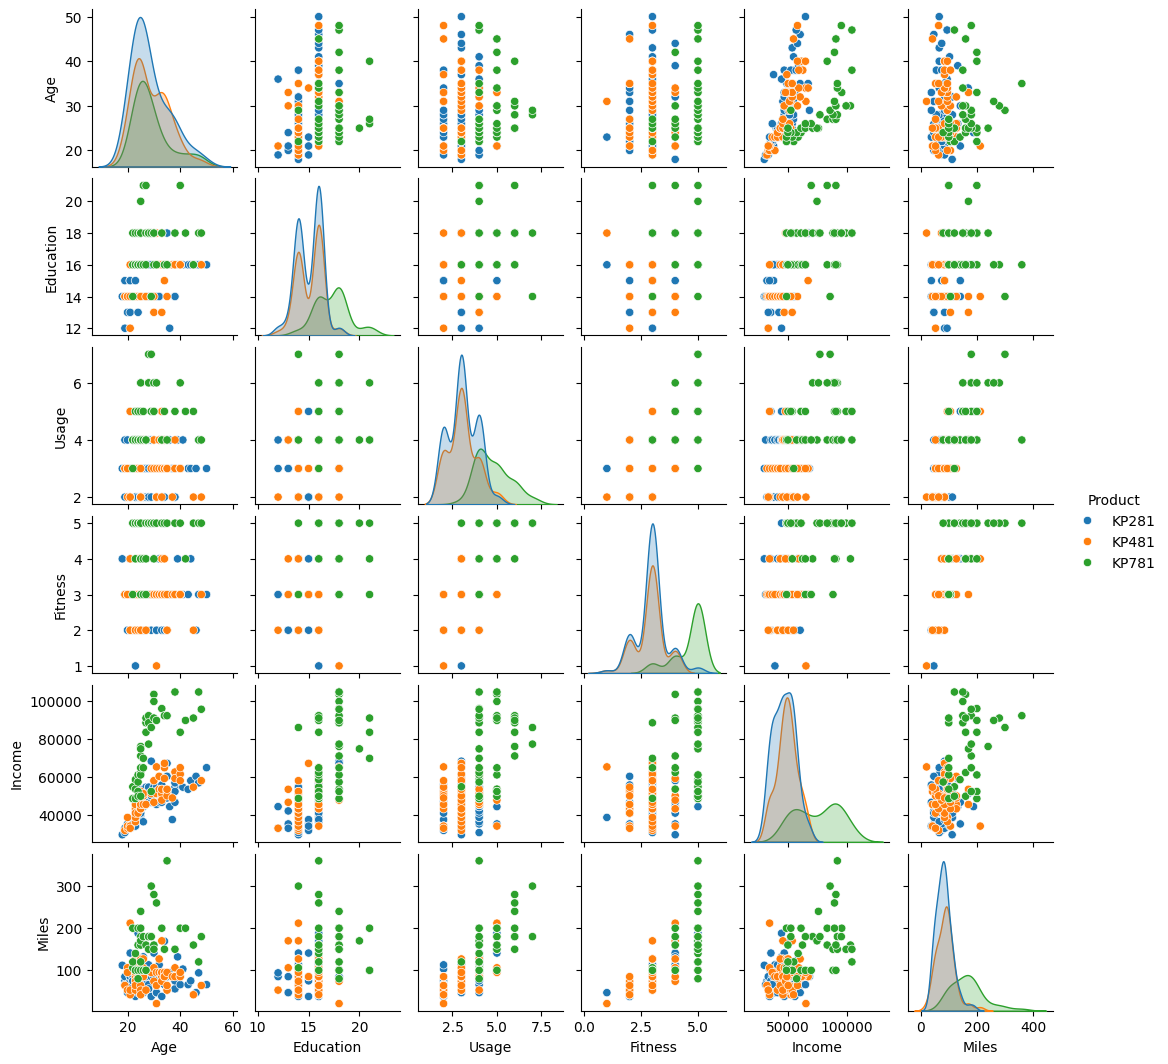

In [ ]:
sns.pairplot( data = df, hue = 'Product', height =1.8)
plt.show()

- The buyers of KP781 i.e. advanced tradmill have higher income compared to same age group for other trade mill buyers.
- Buyers of KP781 have higher education, usuage, high income, they are more fit and they run more miles run/week.


Lets see the sam

### Correlation Matrix

In [ ]:
df.corr(numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


- There is a strong correlation of Fitness with Miles - 0.78, usage and Miles i.e. 0.76, Usage with i.e. 0.66, Education with Income i.e. 0.62
- Meaning Fit person have higher product usages, more usuage mean more mile and higher eduacted people also tend to have higher income.
- we have seen from previous joint plot that KP781 advanced treadmill is purchased by higher income, more fit people.

### Heat map

lets see the same thing which we have done above in the heat map, that is east to visualise

#### All treadmill

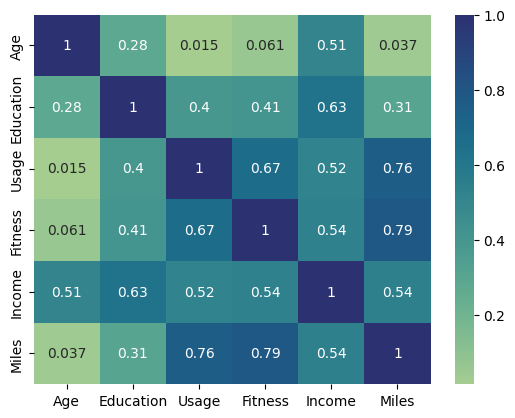

In [ ]:
sns.heatmap(df.corr(numeric_only = True), cmap = 'crest', annot = True)
plt.show()

- Higher correlation between Fitness & Miles, Usage & Miles, Usage & Fitness and Eduaction and Income.
- Higher usages  -> Higher Miles -> Higher fitness

#### KP281

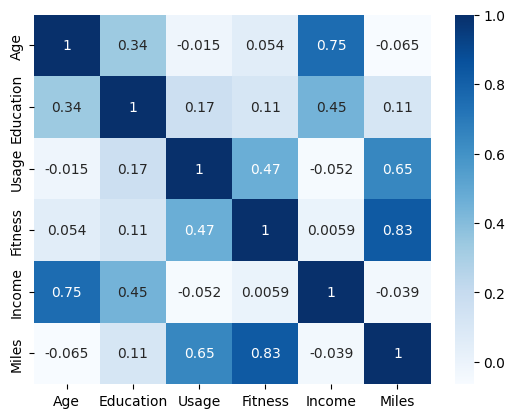

In [ ]:
sns.heatmap(df_T1.corr(numeric_only = True), cmap = 'Blues', annot = True)
plt.show()

- For KP281 entry level treadmill there is a high correlation betwen Fitness & Miles, Age & Income, Usage & Miles.
- Higher Fitness > Higher miles > high usages
- Incomes increases as the age increases

#### KP481

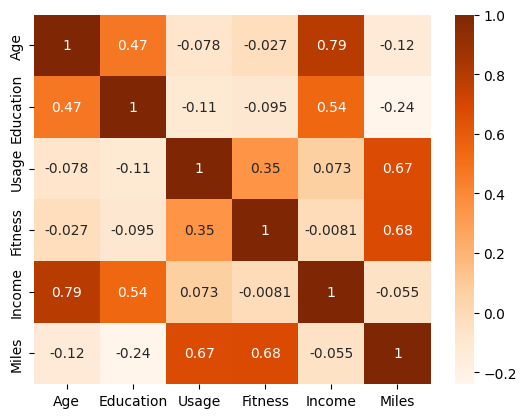

In [ ]:
sns.heatmap(df_T2.corr(numeric_only = True), cmap = 'Oranges', annot = True)
plt.show()

- For KP481 Mid level treadmill, there is a strong correlation between Age & income, Fitness & Miles, and Usage & Miles.
- Higher Age and high income
- Higher fitness > higher miles > higher usage

#### KP781

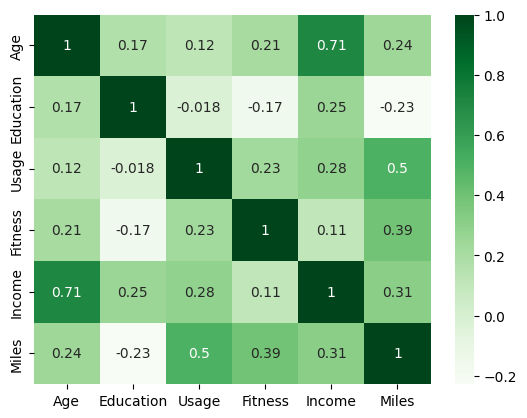

In [ ]:
sns.heatmap(df_T3.corr(numeric_only = True), cmap = 'Greens', annot = True)
plt.show()

- For KP781 treadmill, there is strong correlation between Age and Income, usage and miles.
- Higher usage -> higher miles

### Contingency table

#### Treadmill and Gender

###### Marginal Probability

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['Gender'],
            margins = True,
            margins_name = 'Total')

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


- Probability of KP281 : 80/180 - 44.4 %
- Probabibity of KP481 : 60/180 - 33.3 %
- Probability of KP781 : 40/180 - 22.2 %

Entry level treadmill KP281 is more popular among buyers, them mid level and then advance level.

##### Conditional Probability given male or female

Male is Buyer

- Probability of male purchasing KP281: 40/104 - 38.4%
- Probability of male purchasing KP481: 31/104 - 29.8%
- Probability of male purchasing KP781: 33/104 - 31.7%

```There is higher chances Male purchasing KP281 compared comapared to other treadmills, KP781 and KP481 respectively```


Female is Buyer


- Probability of female purchasing KP281: 40/76 - 52%
- Probability of female purchasing KP481: 29/76 - 38%
- Probability of female purchasing KP781: 7/76 = 9.2%

```There is higher chances female purchasing KP281 comapred to other treadmills, then KP481 and KP781 respectively```

Another way to calculate the same using the normalise function

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['Gender'],
            margins = False,
            margins_name = 'Total',
            normalize = 'columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


- above tables contains the proability of buying particular treadmill KP281, KP481, KP781 given male or female.
We can match the % given with observation given manually above.

##### Conditional Probability given Treadmill purchased

In [ ]:
df1 = pd.crosstab(index = df['Product'],
            columns = df['Gender'],
            margins = False,
            margins_name = 'Total',
            normalize = 'index')
df1

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


- Probability that buyer is female is 50% and male is 50% given product is KP281
- Probability that buyer is female is 48.3% and male is 51.6% given product is KP481
- Probability that buyer is female is 17% and male is 57.7% given product is KP481

Same is visualised in the stacked bar plot below

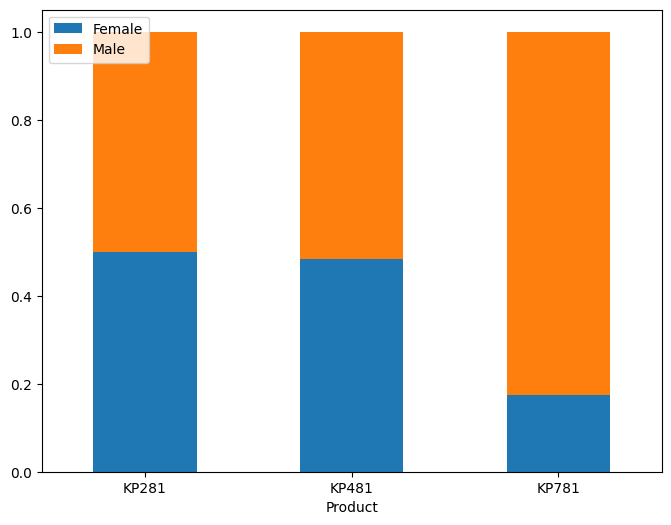

In [ ]:
df1.plot(kind= 'bar', stacked= True, figsize = (8, 6))
plt.xticks(rotation = 0)
plt.legend(loc = 'upper left')
plt.show()

#### Treadmill and Marital Status

###### Marginal Probability

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['MaritalStatus'],
            margins = True,
            margins_name = 'Total')

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
Total,107,73,180


##### Conditional Probability given Partnered or Single

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['MaritalStatus'],
            margins = False,
            margins_name = 'Total',
            normalize = 'columns')

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


Buyer is Partnered

- Probability of partnered purchasing KP281: 44.8%
- Probability of partnered purchasing KP481: 33.6%
- Probability of partnered purchasing KP781: 21.4%

```There is higher chances partnered buyer purchasing KP281 compared comapared to other treadmills, KP481 and KP781 respectively```


Buyer is Single

- Probability of Single purchasing KP281: 43.8%
- Probability of Single purchasing KP481: 32.8%
- Probability of Single purchasing KP781: 23.2%

```There is higher chances female purchasing KP281 comapred to other treadmills, then KP481 and KP781 respectively```

##### Conditional Probability given Treadmill purchased

In [ ]:
df1= pd.crosstab(index = df['Product'],
            columns = df['MaritalStatus'],
            margins = False,
            margins_name = 'Total',
            normalize = 'index')
df1

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


- Probability that buyer is Partnered is 60% and Single is 40% given product is KP281
- Probability that buyer is Partnered is 60% and Single is 40% given product is KP481
- Probability that buyer is Partnered is 57% and Single is 42.5% given product is KP781

Same is visualised in the stacked bar plot below

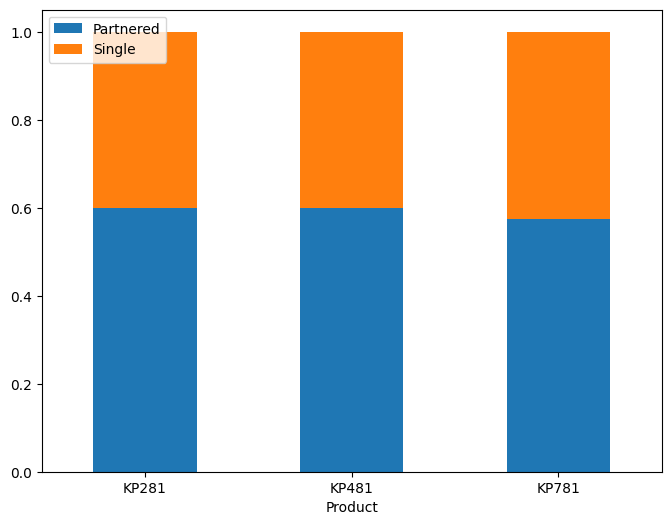

In [ ]:
df1.plot(kind= 'bar', stacked= True, figsize = (8, 6))
plt.xticks(rotation = 0)
plt.legend(loc = 'upper left')
plt.show()

#### Treadmill and Age & Marital Status

###### Marginal Probability

In [ ]:
pd.crosstab(index = [df['Gender'], df['MaritalStatus']],
            columns = df['Product'],
            margins = False,
            margins_name = 'Total')

Product               KP281  KP481  KP781
Gender MaritalStatus                     
Female Partnered         27     15      4
       Single            13     14      3
Male   Partnered         21     21     19
       Single            19     10     14

###### Conditional Probability given the product

In [ ]:
pd.crosstab(index = [df['Gender'], df['MaritalStatus']],
            columns = df['Product'],
            margins = False,
            margins_name = 'Total',
            normalize = 'columns')

Product                KP281     KP481  KP781
Gender MaritalStatus                         
Female Partnered      0.3375  0.250000  0.100
       Single         0.1625  0.233333  0.075
Male   Partnered      0.2625  0.350000  0.475
       Single         0.2375  0.166667  0.350

Given the product is KP281 Probability that buyer is -
- Male & Single - 23.75%
- Male & Partnerd - 26.25%
- Female & Single - 16.25%
- Female & Partnered - 33.75 %

Given the product is KP481 Probability that buyer is -
- Male & Single - 16.6%
- Male & Partnerd - 35%
- Female & Single - 23.33%
- Female & Partnered - 25 %

Given the product is KP781 Probability that buyer is -
- Male & Single - 35%
- Male & Partnerd - 47.5%
- Female & Single - 7.5%
- Female & Partnered - 10 %

###### Conditional Probability given Gender and Marital Status

In [ ]:
df1= pd.crosstab(index = [df['Gender'], df['MaritalStatus']],
            columns = df['Product'],
            margins = False,
            margins_name = 'Total',
            normalize = 'index')
df1

Product                  KP281     KP481     KP781
Gender MaritalStatus                              
Female Partnered      0.586957  0.326087  0.086957
       Single         0.433333  0.466667  0.100000
Male   Partnered      0.344262  0.344262  0.311475
       Single         0.441860  0.232558  0.325581

Given the buyer is Male & Partnered, probability of buying
- KP281 : 34.4%
- KP481 : 34.4%
- KP781 : 31.1%%

Given the buyer is Male & Single, probability of buying
- KP281 :44.1%
- KP481 :23.2%
- KP781 :32.5%

Given the buyer is Female & Partnered, probability of buying
- KP281 :58.6%
- KP481 :32.6%
- KP781 :8.6%

Given the buyer is Female & Single, probability of buying
- KP281 :43.3%
- KP481 :46.6%
- KP781 :10.0%  

Same is visualised in the stacked bar plot below

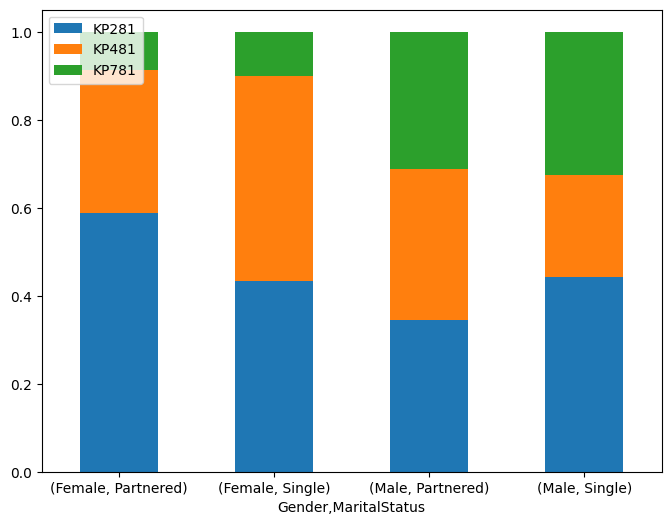

In [ ]:
df1.plot(kind= 'bar', stacked= True, figsize = (8, 6))
plt.xticks(rotation = 0)
plt.legend(loc = 'upper left')
plt.show()

#### Treadmill and Age Group

###### Marginal Probability

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['age_group'],
            margins = True,
            margins_name = 'Total')

age_group,Youth,Adult,Middle Aged,Senior,Total
Product,,,,,
KP281,34,32,11,3,80
KP481,28,24,7,1,60
KP781,17,17,4,2,40
Total,79,73,22,6,180


##### Conditional Probability given the age group

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['age_group'],
            margins = False,
            margins_name = 'Total',
            normalize = 'columns')

age_group,Youth,Adult,Middle Aged,Senior
Product,,,,
KP281,0.43038,0.438356,0.500000,0.500000
KP481,0.35443,0.328767,0.318182,0.166667
KP781,0.21519,0.232877,0.181818,0.333333


Buyer is Youth

- Probability of Youth purchasing KP281, KP481 & KP781 respectively is : 43.0%, 35.4%, 21.5%

```There is higher chances Youth buyer purchasing KP281 compared comapared to other treadmills, KP481 and KP781 respectively```


Buyer is Adult

- Probability of Adult purchasing KP281, KP481 & KP781 respectively is : 43.8%, 32.8%, 23.2%

```There is higher chances female purchasing KP281 comapred to other treadmills, then KP481 and KP781 respectively```

Buyer is Middle Aged

- Probability of Middle aged person purchasing KP281, KP481 & KP781 respectively is : 50%, 31.8%, 18.1%

```There is higher chances Middle buyer purchasing KP281 compared comapared to other treadmills, KP481 and KP781 respectively```

Buyer is Senior

- Probability of Middle aged person purchasing KP281, KP481 & KP781 respectively is : 50%, 16.6%, 33.3%

```There is higher chances Senior buyer purchasing KP281 compared comapared to other treadmills, KP481 and KP781 respectively```

In summary , irrespective of the age group, these is 43-50% probability person buying KP281 entry level machine.

##### Conditional Probability given Treadmill purchased

In [ ]:
df1= pd.crosstab(index = df['Product'],
            columns = df['age_group'],
            margins = False,
            margins_name = 'Total',
            normalize = 'index')
df1

age_group,Youth,Adult,Middle Aged,Senior
Product,,,,
KP281,0.425000,0.400,0.137500,0.037500
KP481,0.466667,0.400,0.116667,0.016667
KP781,0.425000,0.425,0.100000,0.050000


From above contengency table we can say that , given that person is buying KP281, KP481, KP781, Youth and Adults buying probability is more than 80%.

#### Treadmill and Education Group

###### Marginal Probability

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['edu_group'],
            margins = True,
            margins_name = 'Total')

edu_group,Primary,Secondary,Higher,Total
Product,,,,
KP281,2,37,41,80
KP481,1,26,33,60
KP781,0,2,38,40
Total,3,65,112,180


##### Conditional Probability given educational group

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['edu_group'],
            margins = False,
            margins_name = 'Total',
            normalize = 'columns')

edu_group,Primary,Secondary,Higher
Product,,,
KP281,0.666667,0.569231,0.366071
KP481,0.333333,0.400000,0.294643
KP781,0.000000,0.030769,0.339286


- From above contingency table we can see the probability of buying KP281, KP481 and KP781 give that person's education level.
- Probabiity of Primary and Secondary educated person buying KP281 is 66% and 56% respectively/
- Probability of Higher educated person buying KP281, KP481 and KP781 is 36.6%, 29.4% and 33.9% respectively.
- Better the education more probability of buying more high end machine.

##### Conditional Probability given Treadmill purchased

In [ ]:
df1= pd.crosstab(index = df['Product'],
            columns = df['edu_group'],
            margins = False,
            margins_name = 'Total',
            normalize = 'index')
df1

edu_group,Primary,Secondary,Higher
Product,,,
KP281,0.025000,0.462500,0.5125
KP481,0.016667,0.433333,0.5500
KP781,0.000000,0.050000,0.9500


- From above contengency table we can say that , given that person is buying KP281, KP481, KP781, higher educated person have more probability of buying each one of them.
- Given person buying KP781, there is 95% probability it will be bought by highly educated person.

#### Treadmill and income group

###### Marginal Probability

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['income_group'],
            margins = True,
            margins_name = 'Total')

income_group,Low income,Moderate income,High income,Very High income,Total
Product,,,,,
KP281,23,51,6,0,80
KP481,9,44,7,0,60
KP781,0,11,10,19,40
Total,32,106,23,19,180


##### Conditional Probability given income level

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['income_group'],
            margins = False,
            margins_name = 'Total',
            normalize = 'columns')

income_group,Low income,Moderate income,High income,Very High income
Product,,,,
KP281,0.71875,0.481132,0.260870,0.0
KP481,0.28125,0.415094,0.304348,0.0
KP781,0.00000,0.103774,0.434783,1.0


- From above contingency table we can see the probability of buying KP281, KP481 and KP781 give that person's income level.
- better income doesn't really mean person is buying high end machine, the choice of machine is not influenced by income that much.
- only for Very high group, they will go only for KP781.

##### Conditional Probability given Treadmill purchased

In [ ]:
df1= pd.crosstab(index = df['Product'],
            columns = df['income_group'],
            margins = False,
            margins_name = 'Total',
            normalize = 'index')
df1

income_group,Low income,Moderate income,High income,Very High income
Product,,,,
KP281,0.2875,0.637500,0.075000,0.000
KP481,0.1500,0.733333,0.116667,0.000
KP781,0.0000,0.275000,0.250000,0.475


- From above contengency table we can say that , given that person is buying KP281, KP481, there is higher probability that moderate income people tend to buy any type of machine.
- Given person buying KP781, very high income group have 50% probability of buying and 25-25% respectively for moderate and high income group.

#### Treadmill and miles group

###### Marginal Probability

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['miles_group'],
            margins = True,
            margins_name = 'Total')

miles_group,Beginner,Moderate,Active,Enthusiast,Total
Product,,,,,
KP281,12,50,18,0,80
KP481,5,39,15,1,60
KP781,0,8,27,5,40
Total,17,97,60,6,180


##### Conditional Probability given mile group

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['miles_group'],
            margins = False,
            margins_name = 'Total',
            normalize = 'columns')

miles_group,Beginner,Moderate,Active,Enthusiast
Product,,,,
KP281,0.705882,0.515464,0.30,0.000000
KP481,0.294118,0.402062,0.25,0.166667
KP781,0.000000,0.082474,0.45,0.833333


- From above contingency table we can see the probability of buying KP281, KP481 and KP781 give that person's mile/week level.
- Beginners probability of buying KP281 is 70.5% and Enthusiast probability of buying KP781 is 83%

##### Conditional Probability given Treadmill purchased

In [ ]:
df1= pd.crosstab(index = df['Product'],
            columns = df['miles_group'],
            margins = False,
            margins_name = 'Total',
            normalize = 'index')
df1

miles_group,Beginner,Moderate,Active,Enthusiast
Product,,,,
KP281,0.150000,0.625,0.225,0.000000
KP481,0.083333,0.650,0.250,0.016667
KP781,0.000000,0.200,0.675,0.125000


- From above contengency table we can say that , given that person is buying KP281, KP481, there is higher probability that moderate income people tend to buy any type of machine.
- Given person buying KP781, very high income group have 50% probability of buying and 25-25% respectively for moderate and high income group.

### Univariate Analysis

#### Categorical columns

##### Product Sales

In [ ]:
product_count = df['Product'].value_counts()
product_count.index

Index(['KP281', 'KP481', 'KP781'], dtype='object', name='Product')

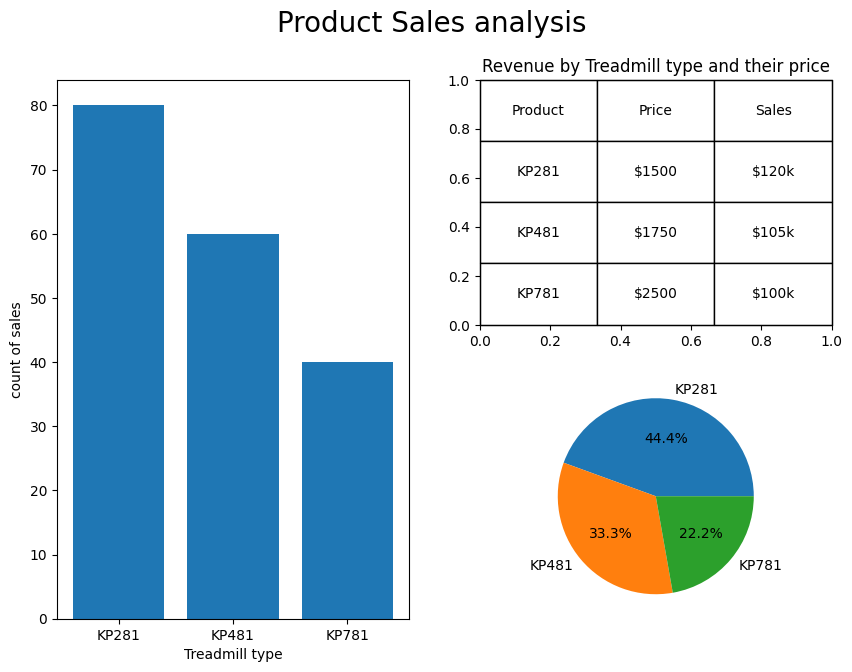

In [ ]:
plt.figure(figsize=(10,7)).suptitle("Product Sales analysis",fontsize=20)

product_count = df['Product'].value_counts()

#1st row and 1st column in 1*2 grid
plt.subplot(1, 2, 1)
plt.bar(product_count.index,product_count.values)
plt.xlabel('Treadmill type')
plt.ylabel('count of sales')

#2nd plot in 2*2 grid
plt.subplot(2, 2, 2)

#adding the treadmmill wise sale as per their unit price and product count
product_portfolio = [['KP281','$1500','$120k'],['KP481','$1750','$105k'],['KP781','$2500','$100k']]

plt.table(cellText = product_portfolio, cellLoc='center',colLabels =['Product','Price','Sales'],colLoc = 'center',bbox =[0, 0, 1, 1])
plt.title('Revenue by Treadmill type and their price')

#calculating the % of the each product type
product_count['percent'] = ((product_count.values/df.shape[0])* 100).round()

plt.subplot(2, 2, 4)
plt.pie(df['Product'].value_counts().values,labels = df['Product'].value_counts().index,autopct = '%.1f%%')
plt.show()

- bar graph show the KP281 is most sold  , followed by KP481 and KP781
- Table on the right shows us the revenue, which tells that revenue of KP281 is highest and then KP481 and KP781 are almost same.
- 44% sale comes from KP281, 33% from KP481 and rest of it from KP781.

##### Gender and Marital Status

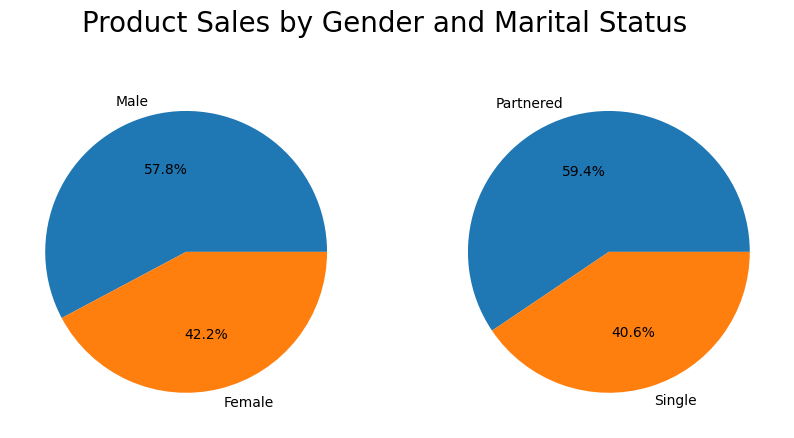

In [ ]:
plt.figure(figsize=(10,5)).suptitle("Product Sales by Gender and Marital Status",fontsize=20)

#1st plot in 1*2 grid
plt.subplot(1, 2, 1)
plt.pie(df['Gender'].value_counts().values,labels = df['Gender'].value_counts().index,autopct = '%.1f%%')

#2nd plot in 1*2 grid
plt.subplot(1, 2, 2)
plt.pie(df['MaritalStatus'].value_counts().values,labels = df['MaritalStatus'].value_counts().index,autopct = '%.1f%%')
plt.show()

- 42.2% females are buyers vs 57.8% male, so male are buying more.
- Partnered buyer are 59.4% compared to Single buyers who are 40.6% , so married people tend to buy more.

##### Usage and Fitness

Let's first check count and % of each Usage freq

In [ ]:
usage_count = df['Usage'].value_counts()

# Calculate percentages
percentages = (usage_count / len(df)) * 100

# Concatenate counts and percentages into a DataFrame
usage = pd.concat([usage_count, percentages], axis=1)
usage.columns = ['Counts', 'Percentages']
usage

,Counts,Percentages
Usage,,
3,69,38.333333
4,52,28.888889
2,33,18.333333
5,17,9.444444
6,7,3.888889
7,2,1.111111


Similarly check count and % of each Fitness level

In [ ]:
fitness_count = df['Fitness'].value_counts()

# Calculate percentages
percentages = (fitness_count / len(df)) * 100

# Concatenate counts and percentages into a DataFrame
fitness = pd.concat([fitness_count, percentages], axis=1)
fitness.columns = ['Counts', 'Percentages']
fitness

,Counts,Percentages
Fitness,,
3,97,53.888889
5,31,17.222222
2,26,14.444444
4,24,13.333333
1,2,1.111111


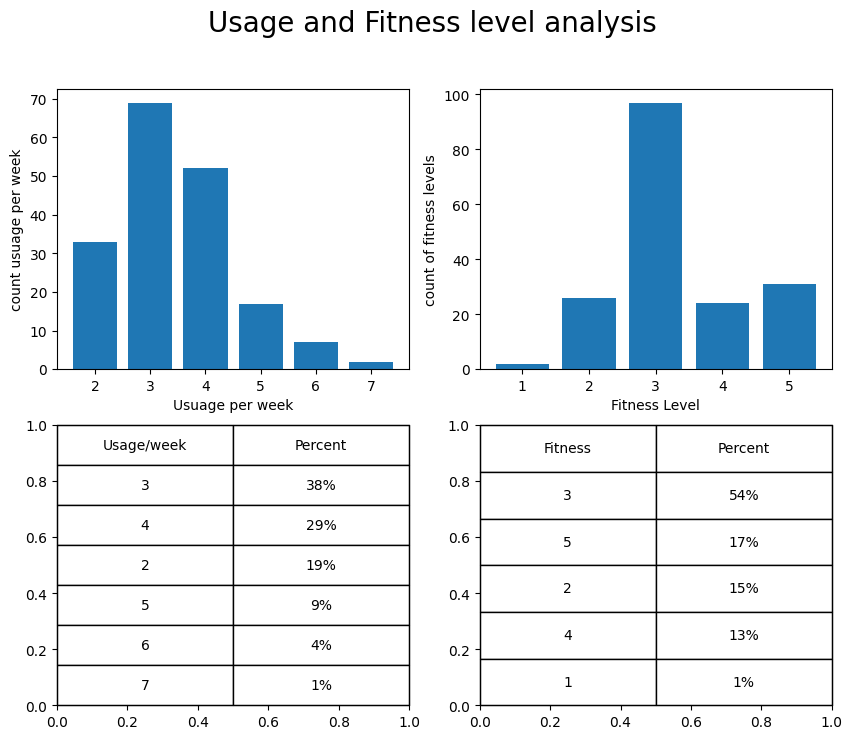

In [ ]:
plt.figure(figsize=(10,8)).suptitle("Usage and Fitness level analysis",fontsize=20)

product_count = df['Product'].value_counts()

#1st row and 1st column in 1*2 grid
plt.subplot(2, 2, 1)
plt.bar(df['Usage'].value_counts().index, df['Usage'].value_counts().values)
plt.xlabel('Usuage per week')
plt.ylabel('count usuage per week')

#2nd plot in 2*2 grid
plt.subplot(2, 2, 2)
plt.bar(df['Fitness'].value_counts().index, df['Fitness'].value_counts().values)
plt.xlabel('Fitness Level')
plt.ylabel('count of fitness levels')

#3rd plot in 2*2 grid
plt.subplot(2, 2, 3)
#using the table calculation above this code
usage_info = [['3','38%'],['4','29%'],['2','19%'],['5','9%'],['6','4%'],['7','1%']]
plt.table(cellText = usage_info, cellLoc='center',colLabels =['Usage/week','Percent'],colLoc = 'center',bbox =[0, 0, 1, 1])

#4th plot in 2*2 grid
plt.subplot(2, 2, 4)
#using the table calculation above this code
fitness_info = [['3','54%'],['5','17%'],['2','15%'],['4','13%'],['1','1%']]
plt.table(cellText = fitness_info, cellLoc='center',colLabels =['Fitness','Percent'],colLoc = 'center',bbox =[0, 0, 1, 1])


plt.show()

- Almost 85% of buyers use treadmil 2-4 times.
- 54% of buyer has fitness 5 which highest on a scale of 1-5 and almost 84% of total buyers have rating above 3 or more mean good fitness level. So buyers are people who have good fitness level and want to maintain it.

#### Numerical columns with bins or without bins

##### Age

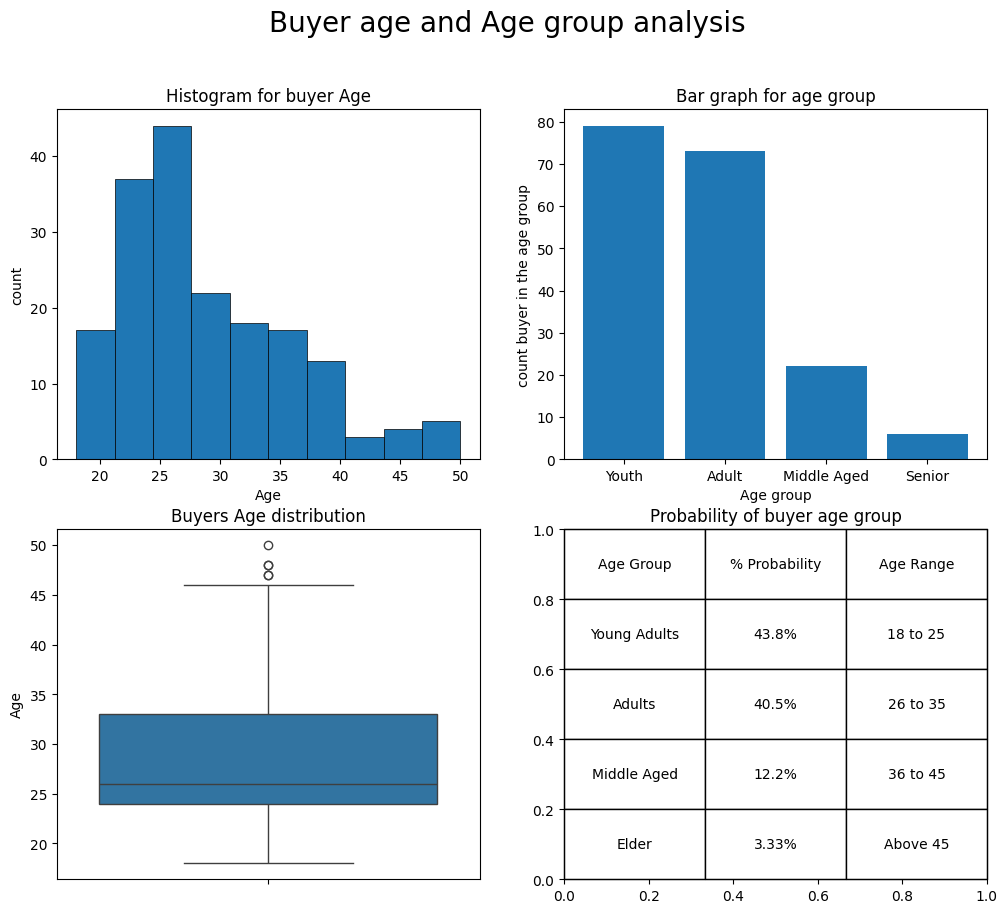

In [ ]:
plt.figure(figsize=(12,10)).suptitle("Buyer age and Age group analysis",fontsize=20)

#1st row and 1st column in 1*2 grid
plt.subplot(2, 2, 1)
plt.hist(df['Age'], linewidth=0.5,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Histogram for buyer Age')

#2nd plot in 2*2 grid
plt.subplot(2, 2, 2)
plt.bar(df['age_group'].value_counts().index, df['age_group'].value_counts().values)
plt.xlabel('Age group')
plt.ylabel('count buyer in the age group')
plt.title('Bar graph for age group')

#3rd plot in 2*2 grid
plt.subplot(2, 2, 3)
sns.boxplot(y = df['Age'])
plt.ylabel('Age')
plt.title('Buyers Age distribution')

#4th plot in 2*2 grid
plt.subplot(2, 2, 4)
#Probaility which is been calculated earlier for different age groups
agegroup_info = [['Young Adults','43.8%','18 to 25'],['Adults','40.5%','26 to 35'],['Middle Aged','12.2%','36 to 45'],['Elder','3.33%','Above 45']]
plt.table(cellText = agegroup_info, cellLoc='center',colLabels =['Age Group','% Probability', 'Age Range'],colLoc = 'center',bbox =[0, 0, 1, 1])
plt.title('Probability of buyer age group')

plt.show()

- Most of the buyers are youth and adult age group and they should be targeted to age group basic marketing campain.

##### Eduaction

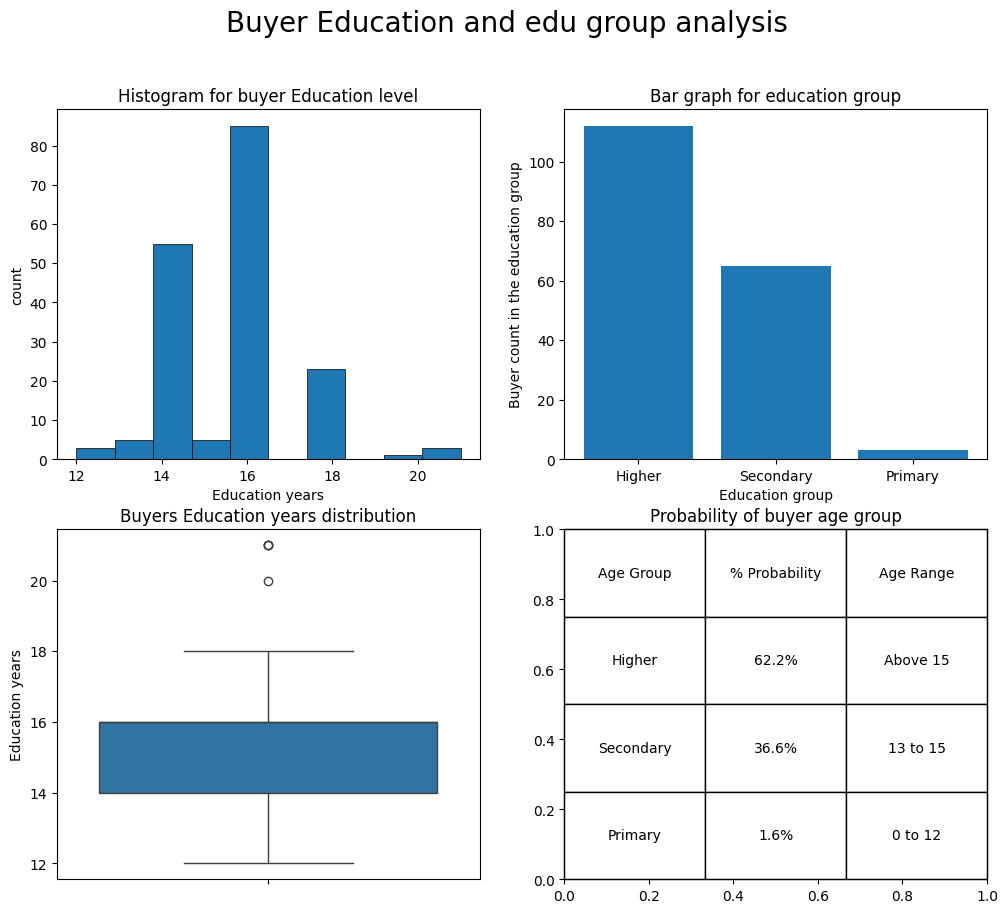

In [ ]:
plt.figure(figsize=(12,10)).suptitle("Buyer Education and edu group analysis",fontsize=20)

#1st row and 1st column in 1*2 grid
plt.subplot(2, 2, 1)
plt.hist(df['Education'], linewidth=0.5,edgecolor='black')
plt.xlabel('Education years')
plt.ylabel('count')
plt.title('Histogram for buyer Education level')

#2nd plot in 2*2 grid
plt.subplot(2, 2, 2)
plt.bar(df['edu_group'].value_counts().index, df['edu_group'].value_counts().values)
plt.xlabel('Education group')
plt.ylabel('Buyer count in the education group')
plt.title('Bar graph for education group')

#3rd plot in 2*2 grid
plt.subplot(2, 2, 3)
sns.boxplot(y = df['Education'])
plt.ylabel('Education years')
plt.title('Buyers Education years distribution')

#4th plot in 2*2 grid
plt.subplot(2, 2, 4)
#Probaility which is been calculated earlier for different age groups
edu_info = [['Higher','62.2%','Above 15'],['Secondary','36.6%','13 to 15'],['Primary','1.6%','0 to 12']]
plt.table(cellText = edu_info, cellLoc='center',colLabels =['Age Group','% Probability', 'Age Range'],colLoc = 'center',bbox =[0, 0, 1, 1])
plt.title('Probability of buyer age group')

plt.show()

- Most of the buyer are from higher education group, so higher educated people should be targetted more for sell.

##### Income

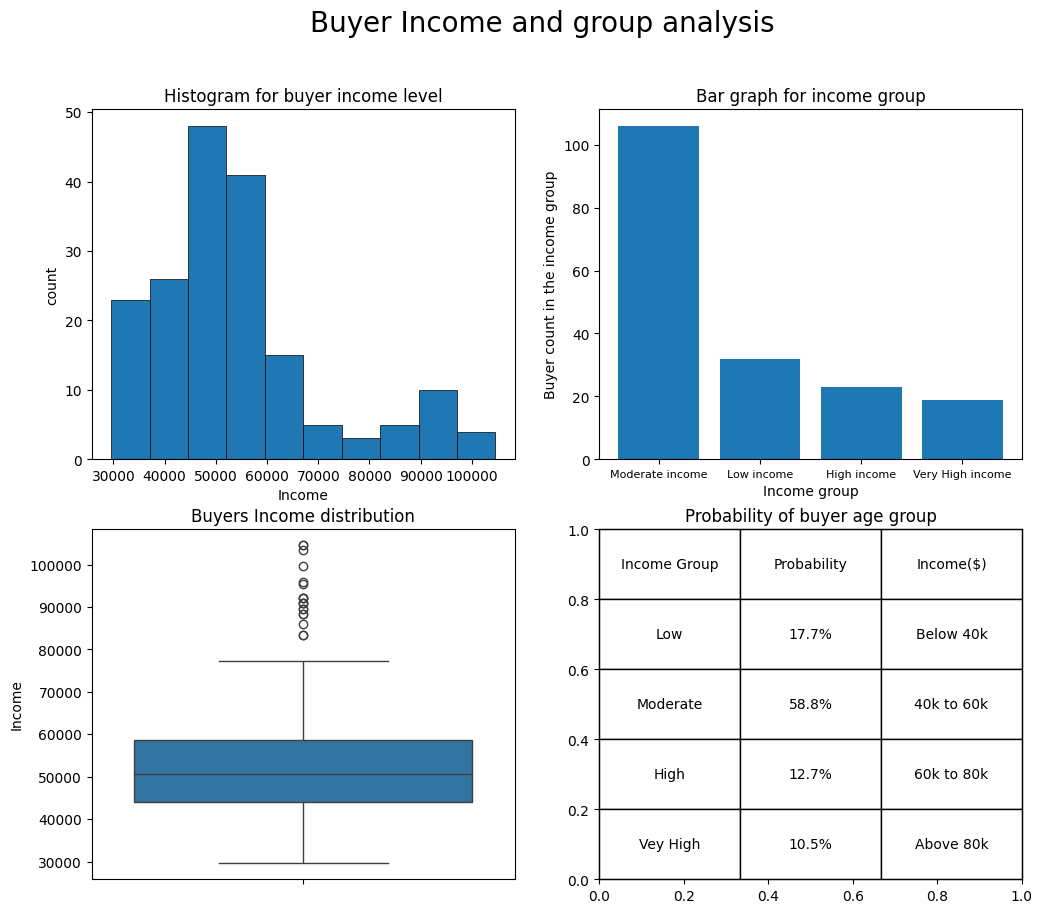

In [ ]:
plt.figure(figsize=(12,10)).suptitle("Buyer Income and group analysis",fontsize=20)

#1st row and 1st column in 1*2 grid
plt.subplot(2, 2, 1)
plt.hist(df['Income'], linewidth=0.5,edgecolor='black')
plt.xlabel('Income')
plt.ylabel('count')
plt.title('Histogram for buyer income level')

#2nd plot in 2*2 grid
plt.subplot(2, 2, 2)
plt.bar(df['income_group'].value_counts().index, df['income_group'].value_counts().values)
plt.xlabel('Income group')
plt.xticks(size =8)
plt.ylabel('Buyer count in the income group')
plt.title('Bar graph for income group')

#3rd plot in 2*2 grid
plt.subplot(2, 2, 3)
sns.boxplot(y = df['Income'])
plt.ylabel('Income')
plt.title('Buyers Income distribution')

#4th plot in 2*2 grid
plt.subplot(2, 2, 4)
#Probaility which is been calculated earlier for different age groups
income_info = [['Low','17.7%','Below 40k'],['Moderate','58.8%','40k to 60k'],['High','12.7%','60k to 80k'],['Vey High','10.5%','Above 80k']]
plt.table(cellText = income_info, cellLoc='center',colLabels =['Income Group','Probability','Income($)'],colLoc = 'center',bbox =[0, 0, 1, 1])
plt.title('Probability of buyer age group')

plt.show()

- Most of the buyers are from mid income group which is 40-60K , which is aspirational buyer but budget people in reality. We have to target them through budgeted product and upsell them our advance treadmill if possible in easy EMIs monthly basis.

##### Weekly Miles walk/run

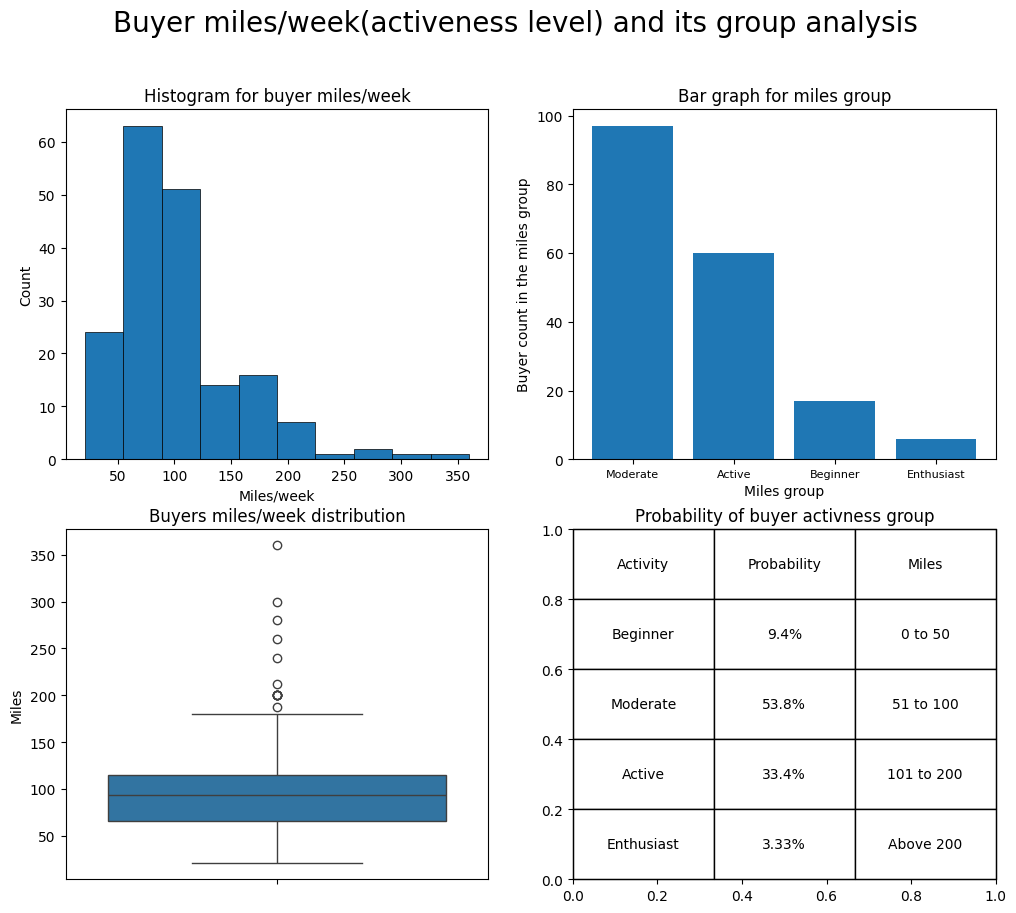

In [ ]:
plt.figure(figsize=(12,10)).suptitle("Buyer miles/week(activeness level) and its group analysis",fontsize=20)

#1st row and 1st column in 1*2 grid
plt.subplot(2, 2, 1)
plt.hist(df['Miles'], linewidth=0.5,edgecolor='black')
plt.xlabel('Miles/week')
plt.ylabel('Count')
plt.title('Histogram for buyer miles/week')

#2nd plot in 2*2 grid
plt.subplot(2, 2, 2)
plt.bar(df['miles_group'].value_counts().index, df['miles_group'].value_counts().values)
plt.xlabel('Miles group')
plt.xticks(size =8)
plt.ylabel('Buyer count in the miles group')
plt.title('Bar graph for miles group')

#3rd plot in 2*2 grid
plt.subplot(2, 2, 3)
sns.boxplot(y = df['Miles'])
plt.ylabel('Miles')
plt.title('Buyers miles/week distribution')

#4th plot in 2*2 grid
plt.subplot(2, 2, 4)
#Probaility which is been calculated earlier for different age groups
miles_info = [['Beginner','9.4%','0 to 50'],['Moderate','53.8%','51 to 100'],['Active','33.4%','101 to 200'],['Enthusiast','3.33%','Above 200']]
plt.table(cellText = miles_info, cellLoc='center',colLabels =['Activity','Probability','Miles'],colLoc = 'center',bbox =[0, 0, 1, 1])
plt.title('Probability of buyer activness group')

plt.show()


- Most of the buyers are moderate runners/walkers who completed between 51-100 miles/week, so we should target that segment. Then Active people who are doing 101-200 miles/week.

### Bi-variate Analysis

#### Product type preference

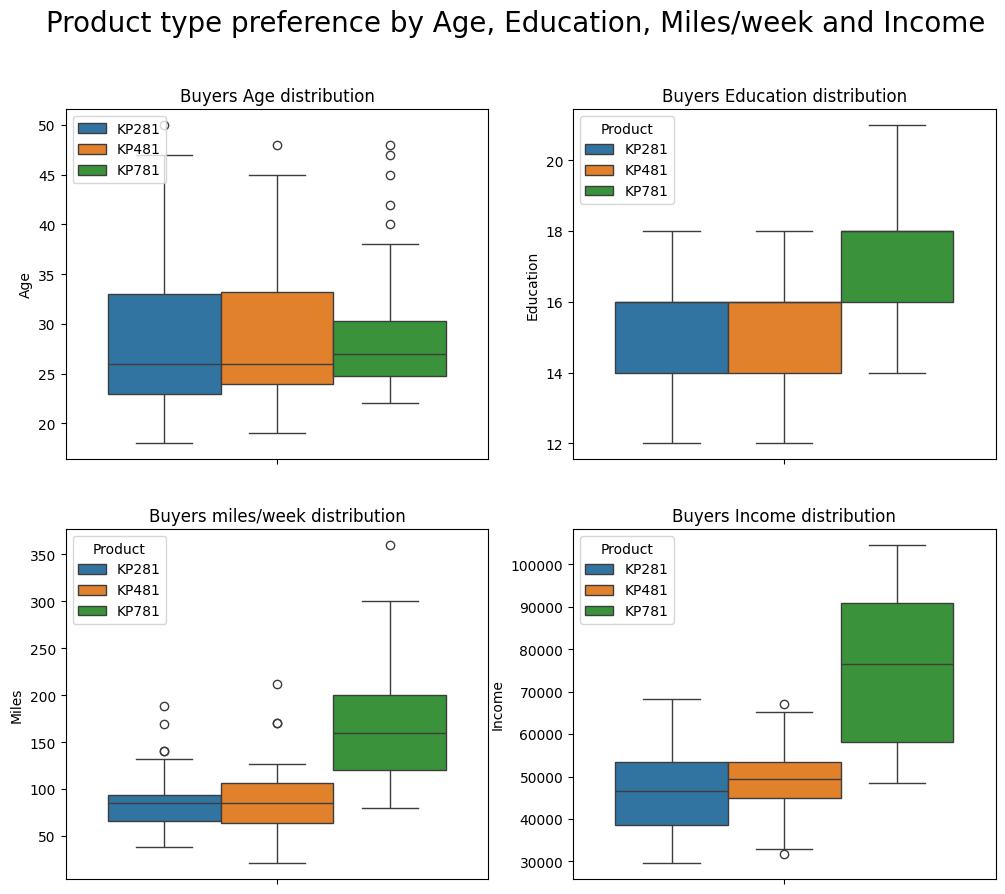

In [ ]:
plt.figure(figsize=(12,10)).suptitle("Product type preference by Age, Education, Miles/week and Income",fontsize=20)

#1st row and 1st column in 2*2 grid
plt.subplot(2, 2, 1)
sns.boxplot(y = df['Age'], hue = df['Product'])
plt.ylabel('Age')
plt.legend(loc='upper left')
plt.title('Buyers Age distribution')

#2nd plot in 2*2 grid
plt.subplot(2, 2, 2)
sns.boxplot(y = df['Education'], hue = df['Product'])
plt.ylabel('Education')
plt.title('Buyers Education distribution')

#3rd plot in 2*2 grid
plt.subplot(2, 2, 3)
sns.boxplot(y = df['Miles'], hue = df['Product'])
plt.ylabel('Miles')
plt.title('Buyers miles/week distribution')

#4th plot in 2*2 grid
plt.subplot(2, 2, 4)
sns.boxplot(y = df['Income'], hue = df['Product'])
plt.ylabel('Income')
plt.title('Buyers Income distribution')

plt.show()

- There is clear indication is there that buyer of KP781 are having better income, ediucation, they are more active(miles/week) and a bit more elder than median user of KP281 and KP481. Inshort the user is doing better in his life compared to others.

#### Product prefered across Age group

In [ ]:
#creating a seried with group by product and counting by age_group
s1 = round(df.groupby('Product')[['age_group']].value_counts(normalize = True)*100,2)

# conversting the series to datafram and resetting the index
df1 = pd.Series(s1, name='count').reset_index()

# pivoting the data
pivot_df1 = df1.pivot(index='Product', columns='age_group', values='count')
pivot_df1

age_group,Youth,Adult,Middle Aged,Senior
Product,,,,
KP281,42.50,40.0,13.75,3.75
KP481,46.67,40.0,11.67,1.67
KP781,42.50,42.5,10.00,5.00


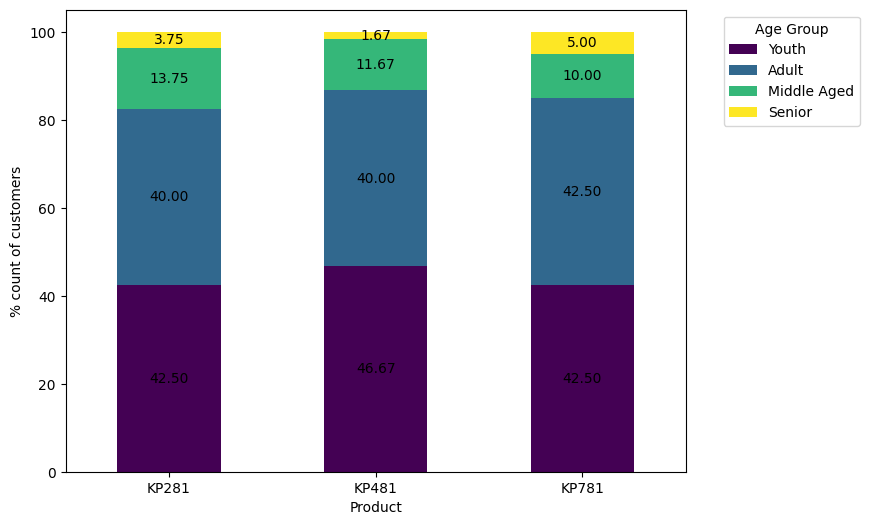

In [ ]:
ax = pivot_df1.plot(kind= 'bar', stacked= True, figsize = (8, 6), colormap='viridis')
plt.xticks(rotation = 0)
plt.ylabel('% count of customers')
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotating the values in th ebar graph
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')
# Moving the legend outside the plot area

plt.show()

- Uniform distribution across all age groups for the different type of treadmills

#### Product prefered across Education group

In [ ]:
#creating a seried with group by product and counting by group
s1 = round(df.groupby('Product')[['edu_group']].value_counts(normalize = True)*100,2)

# conversting the series to datafram and resetting the index
df1 = pd.Series(s1, name='count').reset_index()

# pivoting the data
pivot_df1 = df1.pivot(index='Product', columns='edu_group', values='count')
pivot_df1

edu_group,Primary,Secondary,Higher
Product,,,
KP281,2.50,46.25,51.25
KP481,1.67,43.33,55.00
KP781,0.00,5.00,95.00


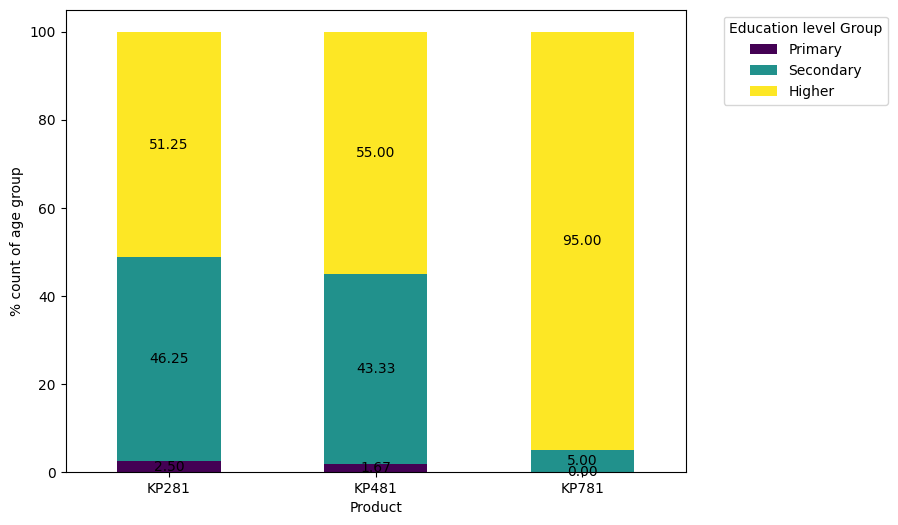

In [ ]:
ax = pivot_df1.plot(kind= 'bar', stacked= True, figsize = (8, 6), colormap='viridis')
plt.xticks(rotation = 0)
plt.ylabel('% count of age group')
ax.legend(title='Education level Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotating the values in th ebar graph
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')
# Moving the legend outside the plot area

plt.show()

- There is very high correlation between the education and treadmill buyers.
- More educated the person , more likely to buy one because 97% people who buy treadmill are either Higher or Secondary educated.
- Higher educated people mostly go with KP781.

#### Product prefered across income group

In [ ]:
#creating a seried with group by product and counting by group
s1 = round(df.groupby('Product')[['income_group']].value_counts(normalize = True)*100,2)

# conversting the series to datafram and resetting the index
df1 = pd.Series(s1, name='count').reset_index()

# pivoting the data
pivot_df1 = df1.pivot(index='Product', columns='income_group', values='count')
pivot_df1

income_group,Low income,Moderate income,High income,Very High income
Product,,,,
KP281,28.75,63.75,7.50,0.0
KP481,15.00,73.33,11.67,0.0
KP781,0.00,27.50,25.00,47.5


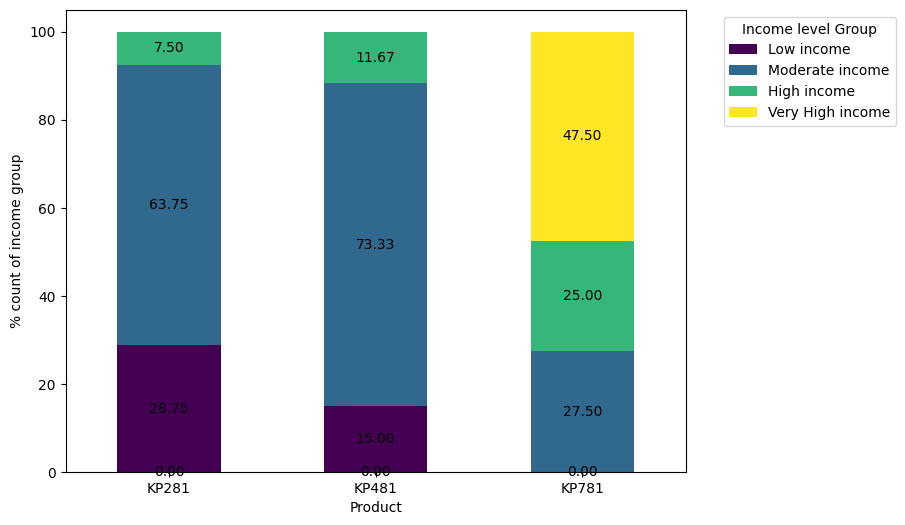

In [ ]:
ax = pivot_df1.plot(kind= 'bar', stacked= True, figsize = (8, 6), colormap='viridis')
plt.xticks(rotation = 0)
plt.ylabel('% count of income group')
ax.legend(title='Income level Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotating the values in th ebar graph
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')
# Moving the legend outside the plot area

plt.show()

- Low income group is most likely to go with entry level treadmill KP281.
- Moderate income group buys mid range KP481 the most and then KP281 and KP781 respectively.
-  KP781 is bought almost 50% time by Very High income group. Then KP481 and KP281.

#### Product prefered across miles / level of activeness group

In [ ]:
#creating a seried with group by product and counting by group
s1 = round(df.groupby('Product')[['miles_group']].value_counts(normalize = True)*100,2)

# conversting the series to datafram and resetting the index
df1 = pd.Series(s1, name='count').reset_index()

# pivoting the data
pivot_df1 = df1.pivot(index='Product', columns='miles_group', values='count')
pivot_df1

miles_group,Beginner,Moderate,Active,Enthusiast
Product,,,,
KP281,15.00,62.5,22.5,0.00
KP481,8.33,65.0,25.0,1.67
KP781,0.00,20.0,67.5,12.50


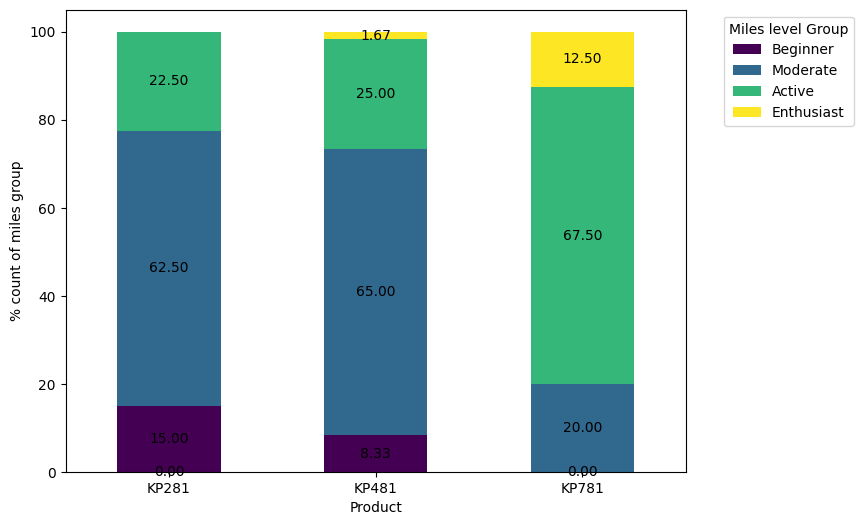

In [ ]:
ax = pivot_df1.plot(kind= 'bar', stacked= True, figsize = (8, 6), colormap='viridis')
plt.xticks(rotation = 0)
plt.ylabel('% count of miles group')
ax.legend(title='Miles level Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotating the values in th ebar graph
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center')
# Moving the legend outside the plot area

plt.show()

- Most of the buyers who purchase treadmill are Moderate active and most likely to buy KP281 and KP481.
- Acive users are more likely to buy advaneced KP781.
- Enthusiast mostly go with KP781.

#### Product, Gender with Age

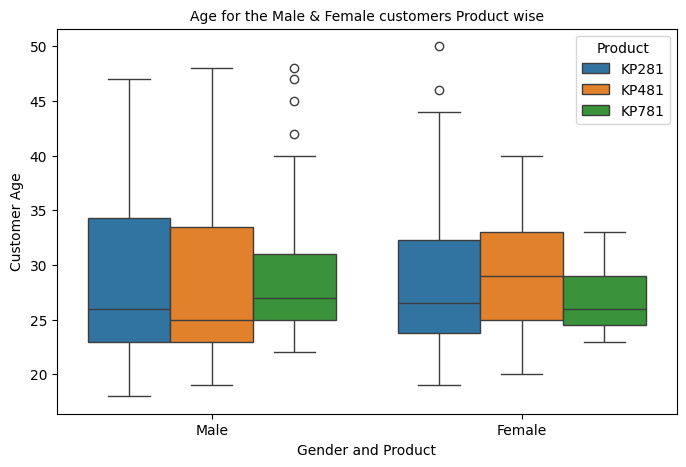

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'Gender', y = 'Age', hue = 'Product' ,data = df)
plt.xlabel('Gender and Product', fontsize=10)
plt.ylabel('Customer Age', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Age for the Male & Female customers Product wise', fontsize=10)
plt.show()

- For KP781, median age of male customers is higher than other tread mills
- For KP481, median age of female customers is higher than other tread mills.
- KP781 customers who are male have some outliers above max age.

#### Product, Gender with Education

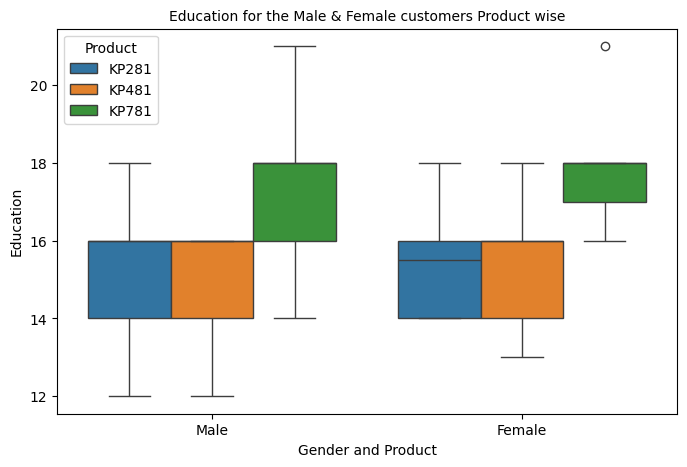

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'Gender', y = 'Education', hue = 'Product' ,data = df)
plt.xlabel('Gender and Product', fontsize=10)
plt.ylabel('Education', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Education for the Male & Female customers Product wise', fontsize=10)
plt.show()

- KP781 male customer's 25%tile is higher than upper range of KP281 and KP481
- median of KP781 female customers is equivalent to upper limit of KP281 and KP481

#### Product, Marital Status with Age

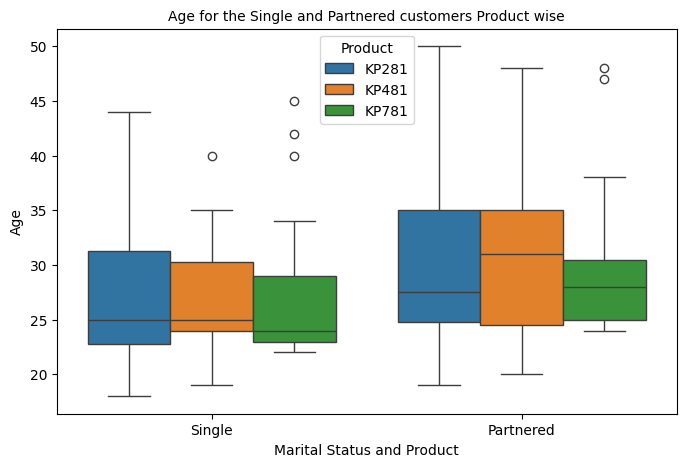

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'MaritalStatus', y = 'Age', hue = 'Product' ,data = df)
plt.xlabel('Marital Status and Product', fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Age for the Single and Partnered customers Product wise', fontsize=10)
plt.show()

- median age of KP281, KP481 for single is higher than is higher than KP781.
- median age of partnered customer for KP481 is higher than others.

## Business Recommendations

- Probability of Female buying KP781, our advanced treadmill is very low 9-10% only, specially single female, there should be some marketing campain to increase the female customer base for KP781.
- Mostly low & moderate income group buy KP281 and KP481 mostly, there should easy EMI options for them to their aspiration level to buy better spec machine.
- 80% people who buy treadmill are youth and adults i.e. 18-35 year old people, focus should remain on them.
- Better the education then better the model person would go for the treadmill but this is not true incase of income, moderate and high income people tend to buy KP281 as well even if they can afford the better version, there should be some discounts given to these people considering buying capacity to let them get one push to move to higher amount item.
- Moderate fit people buy KP281 and KP481 but Active one most would go for KP781, company can organise some free fitness coaching so people will get motivated and will aspire to go for higher version seeing the fitness is something they can't compromise on.
- People who use treadmill 2-4 time are almost 85% of buyers, so more the usage per week, more likely to buy.
- Most of the buyer around 59% are from moderate (40-60k) income group, so this income group should be targetted more to increase the sell.
- people who do 51-100 miles/week are most likely to buy a treadmill, people should be rewared for good habits and should be able to redeem their step count etc to get some discount when they buy something from Aerofit.




